In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [5]:
#the last 3 column are of no use, we delete them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.rename(columns={'v1':'type','v2':'Message'},inplace=True)

In [6]:
df.sample(10)

,type,Message
571,ham,Do you know where my lab goggles went
2905,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""..."
448,ham,LOL ... Have you made plans for new years?
4897,ham,Oh for fuck's sake she's in like tallahassee
123,ham,I am going to sao mu today. Will be done only ...
3877,ham,What you need. You have a person to give na.
352,ham,TODAY is Sorry day.! If ever i was angry with ...
3796,ham,For The First Time In The History 'Need' 'Comf...
3662,ham,Frnd s not juz a word.....not merely a relatio...
5552,ham,Have a safe trip to Nigeria. Wish you happines...


In [7]:
type_encoder=LabelEncoder()

In [8]:
df['type']=type_encoder.fit_transform(df['type'])

In [9]:
df.sample(10)

,type,Message
758,0,U should have made an appointment
3624,0,I want to tel u one thing u should not mistake...
1696,0,"Sorry man, my stash ran dry last night and I c..."
5480,0,Have you seen who's back at Holby?!
30,0,"Wait that's still not all that clear, were you..."
1198,0,Al he does is moan at me if n e thin goes wron...
4192,0,Ok i'm coming home now.
2611,1,Knock Knock Txt whose there to 80082 to enter ...
1811,0,Do Ì_ all wan 2 meet up n combine all the part...
3489,0,Huh but i got lesson at 4 lei n i was thinkin ...


In [10]:
df.isnull().sum()

type       0
Message    0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(5169, 2)

## Exploratory Data Analysis

In [14]:
df['type'].value_counts()

type
0    4516
1     653
Name: count, dtype: int64

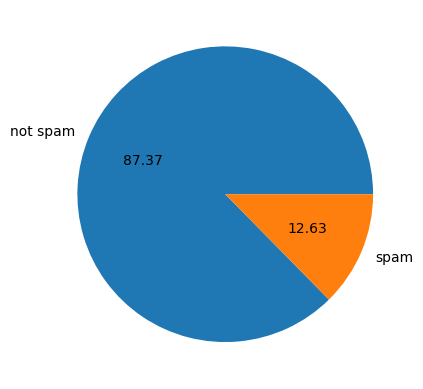

In [15]:
plt.pie(df['type'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\KESAV
[nltk_data]     PATNEEDI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KESAV
[nltk_data]     PATNEEDI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df['no_of_char']=df['Message'].apply(len)
df['no_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_of_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(10)

,type,Message,no_of_char,no_of_words,no_of_sent
4149,0,I only work from mon to thurs but Sat i cant l...,90,22,3
3542,0,I'm e person who's doing e sms survey...,40,11,1
2672,0,Super msg da:)nalla timing.,27,8,1
3450,0,Yes we were outside for like 2 hours. And I ca...,107,25,2
4418,0,How have your little darlings been so far this...,124,28,2
1911,0,Lol grr my mom is taking forever with my presc...,92,20,3
844,0,K.k:)when are you going?,24,8,1
618,0,I come n pick Ì_ up... Come out immediately af...,60,14,1
2666,0,"* Was a nice day and, impressively, i was sens...",140,37,3
1464,0,Wat makes u thk i'll fall down. But actually i...,131,34,3


In [18]:
df[['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
#For Spam Messages
df[df['type']==1][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


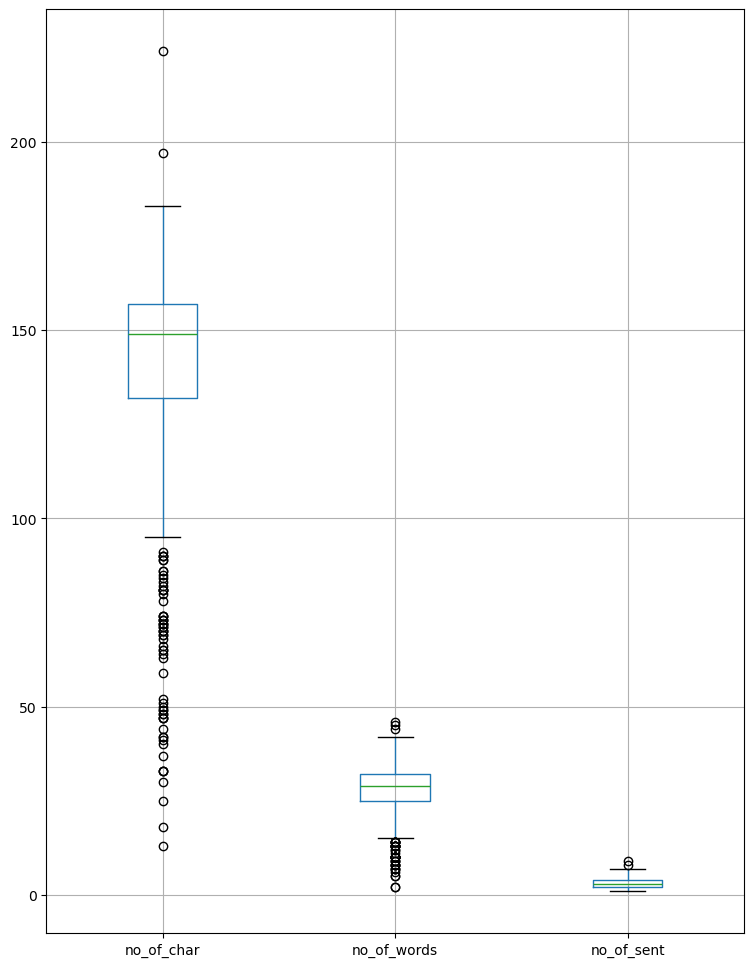

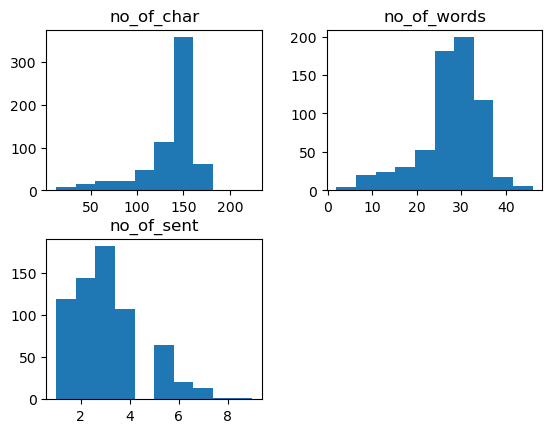

In [20]:
plt.figure(figsize=(9,12))
df[df['type']==1][['no_of_char','no_of_words','no_of_sent']].boxplot()
plt.show()
df[df['type']==1][['no_of_char','no_of_words','no_of_sent']].hist(grid=False)
plt.show()

In [21]:
#For non Spam messages
df[df['type']==0][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


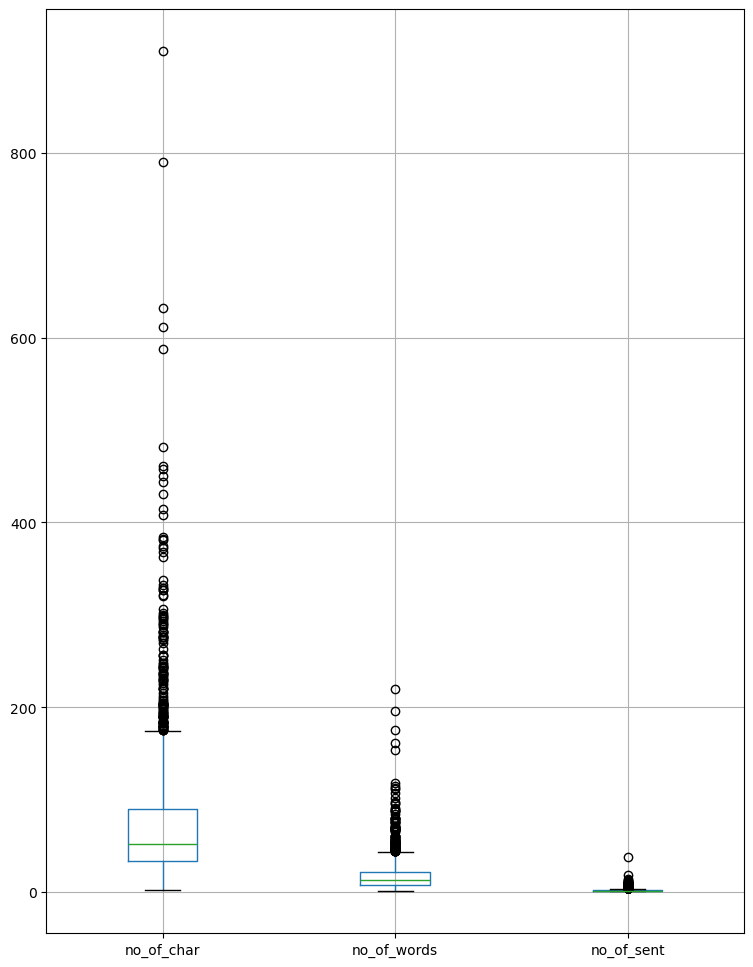

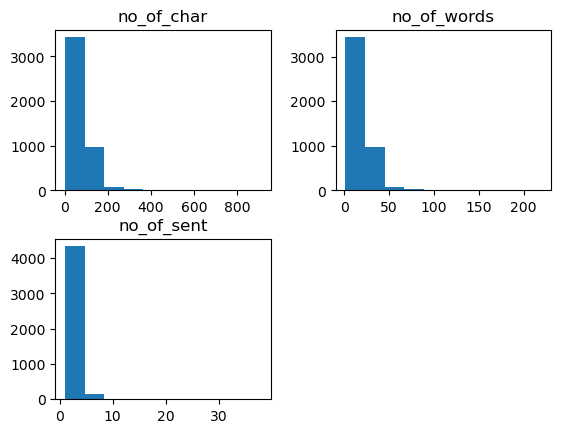

In [22]:
plt.figure(figsize=(9,12))
df[df['type']==0][['no_of_char','no_of_words','no_of_sent']].boxplot()
plt.show()
df[df['type']==0][['no_of_char','no_of_words','no_of_sent']].hist(grid=False)
plt.show()


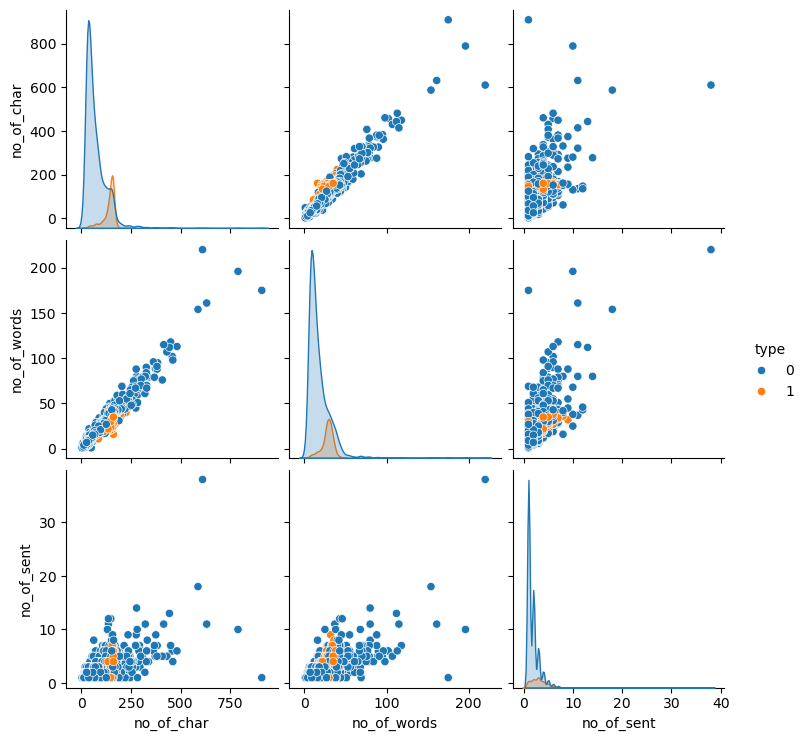

In [23]:
sns.pairplot(df,hue='type')
plt.show()

<Axes: >

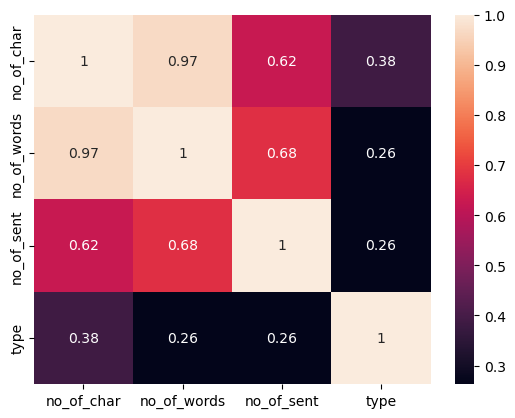

In [24]:
sns.heatmap(df[['no_of_char','no_of_words','no_of_sent','type']].corr(),annot=True)

## Data Preprocessing


In [25]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [26]:
def text_simplifier(text):
    #convert the message to lowercase
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[i for i in text if i.isalnum()]
    text=[i for i in text if (i not in stopwords.words('english') and i not in string.punctuation)]
    stemmer=PorterStemmer()
    text=[stemmer.stem(i) for i in text]
    return " ".join(text)

In [27]:
text_simplifier('Hi How are You loving %%')

'hi love'

In [28]:
df['simple_msg']=df['Message'].apply(text_simplifier)

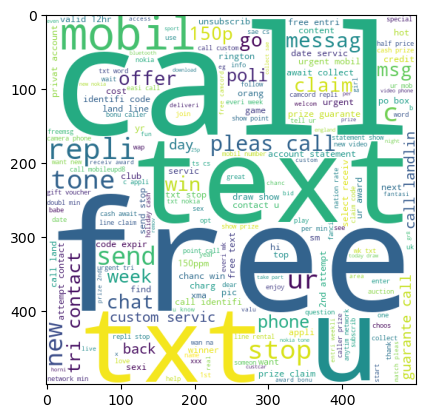

In [29]:
from wordcloud import WordCloud
spam_msg=list(i for i in df[df['type']==1]['simple_msg'])
spam_words=[]
for msg in spam_msg:
    for word in msg.split():
        spam_words.append(word)
word_cloud=WordCloud(width=500,height=500,background_color='white').generate(" ".join(spam_words))
plt.imshow(word_cloud)

<BarContainer object of 30 artists>

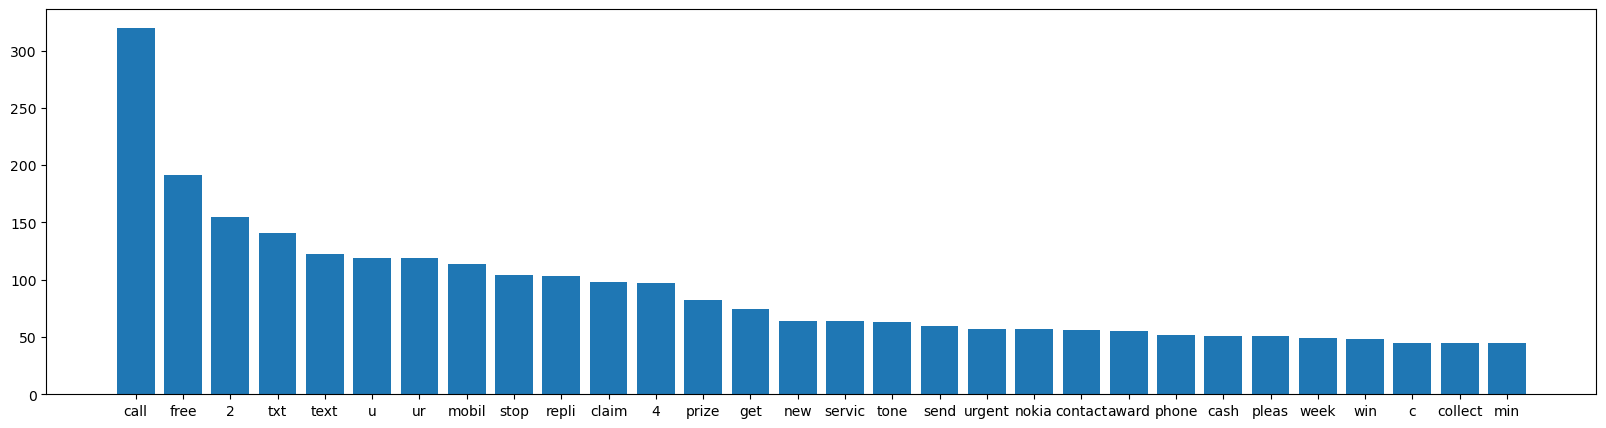

In [30]:
from collections import Counter
spam_count=pd.DataFrame(Counter(spam_words).most_common(30))
plt.figure(figsize=(20,5))
plt.bar(spam_count[0],spam_count[1])

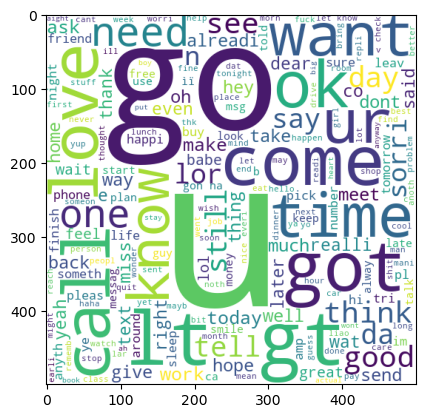

In [31]:
ham_msg=list(i for i in df[df['type']==0]['simple_msg'])
ham_words=[]
for msg in ham_msg:
    for word in msg.split():
        ham_words.append(word)
word_cloud=WordCloud(width=500,height=500,background_color='white').generate(" ".join(ham_words))
plt.imshow(word_cloud)

<BarContainer object of 30 artists>

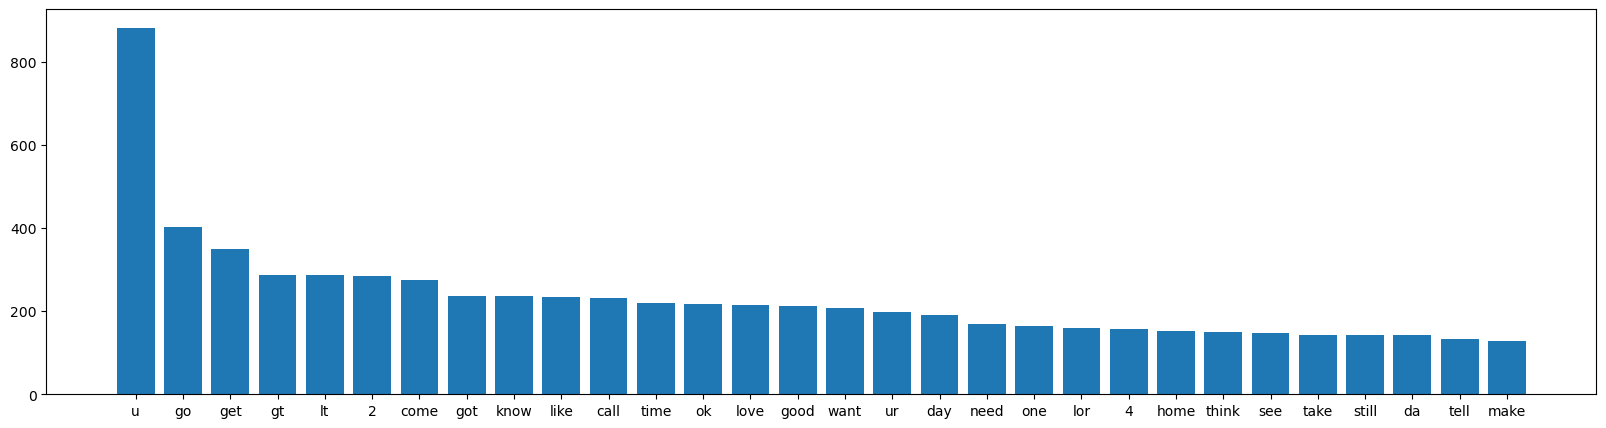

In [32]:
ham_count=pd.DataFrame(Counter(ham_words).most_common(30))
plt.figure(figsize=(20,5))
plt.bar(ham_count[0],ham_count[1])

## Model- Naive Bayes

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3500)

In [34]:
X=(tfidf.fit_transform(df['simple_msg'])).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
Y=df['type'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [38]:
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
ypred_mnb=mnb.predict(X_test)
print(accuracy_score(Y_test,ypred_mnb))
print(confusion_matrix(Y_test,ypred_mnb))
print(precision_score(Y_test,ypred_mnb))

0.9758220502901354
[[916   0]
 [ 25  93]]
1.0


In [39]:
#bnb=BernoulliNB()
#bnb.fit(X_train,Y_train)
#ypred_bnb=bnb.predict(X_test)
#print(accuracy_score(Y_test,ypred_bnb))
#print(confusion_matrix(Y_test,ypred_bnb))
#print(precision_score(Y_test,ypred_bnb))

In [40]:
##So we are using tfidf, muntinonialNB

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
lr=LogisticRegression()
svc=SVC(kernel='rbf')
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=8)
knc=KNeighborsClassifier(n_neighbors=5,weights='distance')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [43]:
#clfs={'Linear Reg':lr,'Support Vector':svc,
      #'MultinimialNb':mnb,
      #'Decision Tree':dtc,
    #  'KNeighbors':knc,
     # 'Random Forest':rfc,
 #     'Adaboost':abc,
  #    'Bagging':bc,
   #   'Extra Tree':etc,
    #  'Gradient Boost':gbc,
     # 'XGB':xgb}

In [44]:
clfs={'MultinimialNb':mnb,
      'Random Forest':rfc,
      'Extra Tree':etc,
      }

In [45]:
def train_classifier(clf,X_train,Y_train,X_text,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    precision=precision_score(Y_test,y_pred)
    return accuracy,precision

In [46]:
accuracy_list=[]
precision_list=[]
for i,j in clfs.items():
    Accuracy,Precision=train_classifier(j,X_train,Y_train,X_test,Y_test)
    accuracy_list.append(Accuracy)
    precision_list.append(Precision)
    #print("For",i)
    #print("Accuracy is ",Accuracy)
    #print("Precision is ",Precision)

In [47]:
performance_df_3000=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_list,'Precision':precision_list}).sort_values('Accuracy',ascending=False).sort_values('Precision',ascending=False)
performance_df_3000

,Algorithm,Accuracy,Precision
1,Random Forest,0.980658,1.000000
0,MultinimialNb,0.975822,1.000000
2,Extra Tree,0.978723,0.989796


In [48]:
from sklearn.ensemble import VotingClassifier
estimator=[('MNB',mnb),('ET',etc),('RF',rfc)]
vc=VotingClassifier(estimator)

In [49]:
vc.fit(X_train,Y_train)
y_pred_voting=vc.predict(X_test)
print("Accuracy is",accuracy_score(Y_test,y_pred_voting))
print("Precision is",precision_score(Y_test,y_pred_voting))

Accuracy is 0.9806576402321083
Precision is 1.0


In [50]:
#from sklearn.ensemble import StackingClassifier
#c=StackingClassifier(estimator,final_estimator=RandomForestClassifier())


In [51]:
#sc.fit(X_train,Y_train)
#y_pred_stacking=sc.predict(X_test)
#print("Accuracy is",accuracy_score(Y_test,y_pred_stacking))
#print("Precision is",precision_score(Y_test,y_pred_stacking))

In [52]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(vc,open('model.pkl','wb'))